In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df1= pd.read_csv("mortgage.csv",names=["complaintdate","product","subproduct" ,"issue","subissue","consumer_narrative","company_public_response","company","state" ,"zip","tags","companyconsent","via","send_to_company_date","company_respons e_consumer","timely","consumer_disputed","id"],skiprows=1)
df1=df1[df1['consumer_narrative'].notnull()]

In [ ]:
df2=df1.set_index[("issue")==("Applying for a mortgage")]
df2.loc["Applying for a mortgage","consumer_narrative"].head()

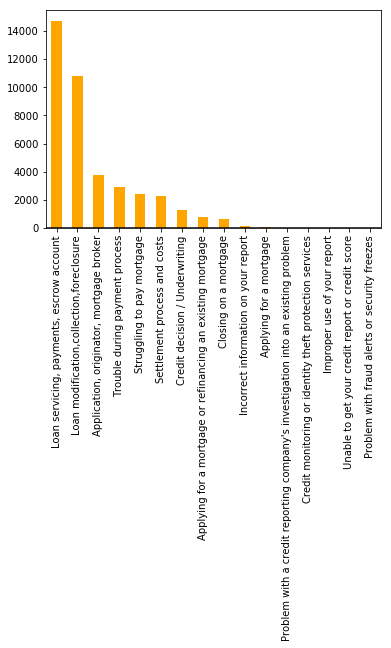

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
df1["issue"].value_counts()
df1['issue'].value_counts().head(20).plot(kind='bar',color='orange'); plt.axhline(0, color='k')

In [29]:
df2=df1.set_index("issue")
df2.loc["Applying for a mortgage","consumer_narrative"].head()

issue
Applying for a mortgage    On behalf of my Client  XXXX   XXXX   XXXX   X...
Applying for a mortgage    Since being denied a loan medication ( see com...
Applying for a mortgage    CitiMortgage  - in below-the-belt methodology ...
Applying for a mortgage    I contracted with  XXXX  as an   XXXX   in   X...
Applying for a mortgage    Ocw en Loan Servicing is  playing games with m...
Name: consumer_narrative, dtype: object

In [99]:
from nltk.tokenize import RegexpTokenizer 
tokenizer = RegexpTokenizer(r'\w+') 
df2["tokens"] = df2["consumer_narrative"].apply(tokenizer.tokenize)

In [100]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
stemmer = PorterStemmer() 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer();

In [101]:
mortgage_dict=['refinance','borrower','mortgage','lender','reporting','refinanced','financed','finance']

In [102]:
def stemandlemma(consumer_narrative):
    preprocess_list = list()
    words = consumer_narrative.lower().split()
    for w in words:
        if(w not in mortgage_dict):
            preprocess_list.append( lemmatizer.lemmatize(w) )
        else:
            preprocess_list.append(w)
    return " ".join(preprocess_list)

In [103]:
def removeNER(consumer_narrative):
    preprocess_list = list()
    words = consumer_narrative.lower().split()
    for w in words:
        preprocess_list.append( stemmer.stem(w) )
    return preprocess_list

In [104]:
def preprocess_consumer_narrative( consumer_narrative):
    preprocess_list = list()
    for text in consumer_narrative:
        letters_only = re.sub("[^a-zA-Z]", " ", text) 
        letters_only = re.sub("XX","",letters_only)
        words = letters_only.lower().split()                             
        stops = set(stopwords.words("english"))                  
        meaningful_words = [w for w in words if not w in stops]
        preprocess_list.append(" ".join( meaningful_words ))
    return preprocess_list  

In [105]:
df2['consumer_newnarrative'] = preprocess_consumer_narrative( df2.consumer_narrative)
df2['consumer_newnarrative'] = df2['consumer_newnarrative'].map(stemandlemma)

In [106]:
from io import StringIO
s=StringIO()
df2['consumer_newnarrative'].apply(lambda x: s.write(x))
k=s.getvalue()
s.close()
k=k.lower()
k=k.split()

In [107]:
import collections as co
import re
words = co.Counter(nltk.corpus.words.words())
stopWords =co.Counter( nltk.corpus.stopwords.words() )
k=[i for i in k if i in words and i not in stopWords]
s=" ".join(k)
df2 = co.Counter(k)

In [108]:
df2.most_common(10)

[('payment', 86436),
 ('loan', 85427),
 ('mortgage', 77507),
 ('would', 43322),
 ('home', 38552),
 ('time', 37349),
 ('bank', 35332),
 ('told', 30557),
 ('modification', 29680),
 ('month', 28668)]

In [112]:
a1=df2.most_common(10)

In [113]:
print(a1)

[('payment', 86436), ('loan', 85427), ('mortgage', 77507), ('would', 43322), ('home', 38552), ('time', 37349), ('bank', 35332), ('told', 30557), ('modification', 29680), ('month', 28668)]


In [115]:
del (a1[0:2])
print(a1)

[('would', 43322), ('home', 38552), ('time', 37349), ('bank', 35332), ('told', 30557), ('modification', 29680), ('month', 28668)]


In [124]:
b1=df2.most_common(10)
print(b1)

[('payment', 86436), ('loan', 85427), ('mortgage', 77507), ('would', 43322), ('home', 38552), ('time', 37349), ('bank', 35332), ('told', 30557), ('modification', 29680), ('month', 28668)]


In [91]:
df2.loc['Problem with fraud alerts or security freezes']

,complaintdate,product,subproduct,subissue,consumer_narrative,company_public_response,company,state,zip,tags,companyconsent,via,send_to_company_date,company_respons e_consumer,timely,consumer_disputed,id,tokens
issue,,,,,,,,,,,,,,,,,,
Problem with fraud alerts or security freezes,05/18/2017,Mortgage,Conventional home mortgage,NaN,XXXX XXXX of XXXX XXXX in arizona is cr...,NaN,Primary Financial Services L.L.C.,AZ,850XX,NaN,Consent provided,Web,05/19/2017,Untimely response,No,NaN,2487215,"[XXXX, XXXX, of, XXXX, XXXX, in, arizona, is, ..."
Problem with fraud alerts or security freezes,06/19/2017,Mortgage,Conventional home mortgage,NaN,I refinanced my home in XX/XX/XXXXthrough my b...,NaN,JPMORGAN CHASE & CO.,NJ,083XX,Servicemember,Consent provided,Web,06/19/2017,Closed with explanation,Yes,NaN,2552763,"[I, refinanced, my, home, in, XX, XX, XXXXthro..."
